**量子版半加算器**

- Ancilla Bit(アンシラビット、補助ビット) = |0〉を使う。  
- |A〉と|B〉のAND…桁上り  
  - |A〉● |B〉⊕ |0〉= |A〉|B〉⊕ |0〉= |A〉|B〉= |C〉  
- |A〉と|B〉とのXOR…総和  
  - (|A〉⊕|0〉) ⊕ |B〉= |A〉⊕ |B〉=|S〉

**Qiskit関連import**

In [1]:
# Import the qiskit library
#量子ビット
from qiskit import QuantumCircuit

#シミュレータ
from qiskit_aer import StatevectorSimulator

#ブロッホ球表示
from qiskit.visualization import plot_bloch_multivector

#シミュレータとパスマネージャとサンプラとグラフ化
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

#表示をクリア
from IPython.display import clear_output

**量子ビット、古典ビットの用意**  
※QuntaumCircuitのインスタンス名称をcircuit→qcとする  
- q₀ : |A〉  
- q₁ : |B〉  
- q₂,q₄ : Work Bit
- q₃ : Ancilla Bit  
    *Qiskitでシミュレートする場合はAND(CCNOT)をq₃で作ってq₄で測定する。q₃は再び|0〉に戻す。
- c₀,c₁ : 古典ビット  


\
**【ワークビット（計算ビット）とアンシラビット（補助ビット）】**  
**1. 量子ビットの生成コスト**
- **物理的な実装コスト**  
  量子ビットは超伝導回路、イオントラップ、光子などの物理システムを使って実現されます。これらのシステムは高度に精密で、設置や維持に多大なリソースが必要です。  
  例えば：
  - 超伝導量子ビットの場合、極低温環境（ミリケルビン温度）が必要。
  - イオントラップでは、レーザーや真空システムの精密な制御が必要。

- **量子ビット数が増えると制御が難しくなる**  
  各量子ビットを正確に操作・制御するには、多数の配線や高精度な制御回路が必要になります。量子ビットが増えるほど、これらの要求が指数関数的に複雑化します。

---

**2. エラー率の管理**
- **デコヒーレンスとエラー**  
  量子ビットは外部環境との相互作用により、容易にデコヒーレンスを引き起こし、エラーが発生します。追加の量子ビットを導入することは、エラーのリスクを高めるため、必要最小限に抑えることが望ましいです。

- **エラー訂正に必要なビット数**  
  実用的な量子コンピューティングには、エラー訂正が必要です。これには1つの論理量子ビットを作るために多数（数十～数千）の物理量子ビットが必要となるため、量子ビットを無駄にできません。

---

**3. 計算資源の最適化**
- **計算ビット vs 補助ビット**  
  計算ビットは直接的に結果を生み出すためのビットで、量子コンピュータの主な目的である「計算」を担います。一方、補助ビットは計算を効率的に行うための補助的な役割に過ぎません。  
  限られたリソースの中で、できるだけ計算ビットを有効活用し、補助ビットの数を最小化することが設計上の重要な課題です。

- **量子回路の簡略化**  
  補助ビットの数を減らすことで、回路全体の複雑さを軽減し、計算時間を短縮できます。これにより、物理的なコストだけでなく、計算時間やエネルギーのコストも削減されます。

---

**4. 実用的な制限**
現在の量子コンピュータでは、使用可能な量子ビット数が非常に限られています（2024年時点では数百程度）。そのため、計算ビットと補助ビットを効率的に区別し、必要最小限の量子ビットで計算を行う設計が求められます。

---

**結論**
量子ビットの生成・制御コストが非常に高いため、計算ビット（ワークビット）と補助ビット（アンシラビット）の役割を明確に分け、計算資源を効率よく活用することが重要です。この区別により、量子コンピュータのハードウェアやアルゴリズムの設計を最適化できます。

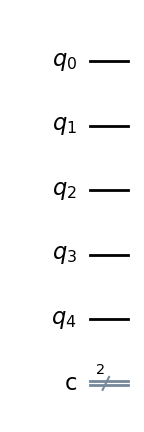

In [2]:
#量子ビット4つ（|A〉|B〉各1、Anciila Bit|0〉3つ）と古典ビット2つ用意
qc = QuantumCircuit(5,2) #5量子ビット、２古典ビットを準備

#量子回路を表示
qc.draw(output="mpl")

**入力ビットを準備**  
1. q₀とq₁をそれぞれ反転して|１〉に設定 : |1⟩|1⟩ → |10⟩
2. q₀だけ反転 : |0⟩|1⟩ → |01⟩
3. q₁だけ反転 : |0⟩|1⟩ → |01⟩ 
4. どちらも基底状態のまま : |0⟩|0⟩ → |00⟩


In [3]:
#1. q₀とq₁をXゲートで反転

qc.x(0)
qc.x(1)


#2. q₀だけXゲートで反転
"""
qc.x(0)
"""

#3. q₁だけXゲートで反転
"""
qc.x(1)
"""

#4. どちらも基底状態のまま
"""
操作をしない
"""

'\n操作をしない\n'

**XORゲート**  
q₀とq₂、q₁とq₂の順番でそれぞれCNOTゲートを構成

In [4]:
#q₀でq₂、q₁でq₂の順番を制御
qc.cx(0,2)
qc.cx(1,2)

**ANDゲート**  
q₀とq₁のANDの結果とq₃でCONTゲートを構築

In [5]:
#q₀とq₁のANDの結果をq₃に格納
qc.ccx(0,1,3)

#q₃でq₄を制御
qc.cx(3,4)

#q₃をアンコンピュート
qc.ccx(0,1,3)

**観測**  
XORの結果q₂とANDの結果q₄を測定  
  
※別の書き方  
qc.measure([2,4], [0,1])  # q₂→c₀, q₄→c₁の測定と記録

In [6]:
#q₂とq₄の測定して各々の観測結果をC₀とC₁に記録
qc.measure(2,0)
qc.measure(4,1)

**半加速器のQIskitでの回路図を表示**

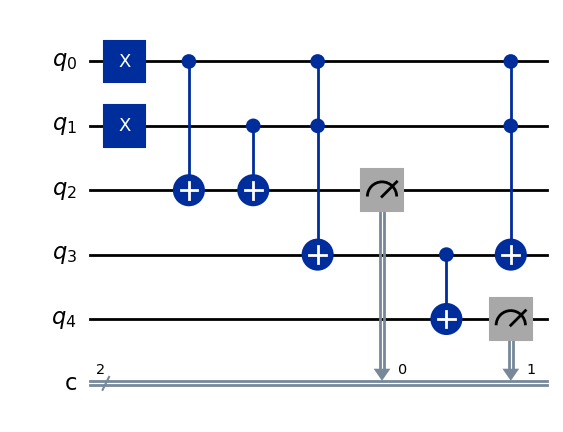

In [7]:
#表示をクリア
clear_output(wait=True)

#回路図を表示
qc.draw(output="mpl")

**測定結果を表示**  
- |0⟩|0⟩ → |00⟩ （0 + 0 = 0）
- |0⟩|1⟩ → |01⟩ （0 + 1 = 1）
- |1⟩|0⟩ → |01⟩ （1 + 0 = 1）
- |1⟩|1⟩ → |10⟩ （1 + 1 = 2）

 > Counts: {'10': 1024}


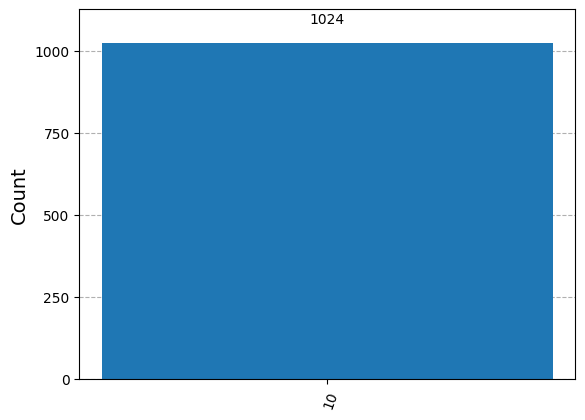

In [8]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(qc)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

**実機で実行**
- 認証情報はディスクに保存済み。
- [text](qt_hundson_intro.ipynb)のデッドコピー

最も空いているバックエンドは:  <IBMBackend('ibm_kyiv')>
job id: cxm89y76t010008d5ncg
 > Counts: {'10': 3742, '00': 267, '01': 29, '11': 58}


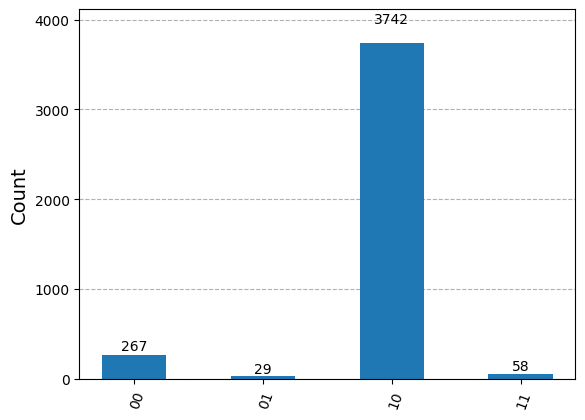

In [9]:
#実機実行時はserviceインスタンス作成が必要
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print("最も空いているバックエンドは: ", backend)

# 回路を実機で実行可能なbasisゲートにトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

# Samplerで実行します
sampler = Sampler(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id()) # job idの確認

# ジョブの実行状態を確認します
job.status()

### job has successfully runになってから実行します ###
result = job.result()
print(f" > Counts: {result[0].data.c.get_counts()}")

from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.c.get_counts())